<a href="https://colab.research.google.com/github/AlexeyK12/Data_scientist-Sberuniversity/blob/main/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%94%D0%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа 3
## Математическая оптимизация

В этом домашнем задании вам предстоит найти минимум функции используя метод `RMSProp`.

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### Вам дана функция $y(x) = x^{3} \ln(x)$

1. Выпишите вид производной этой функции ($y'(x)$). (можно сделать это в виде latex кода, добавления картинки или записью кода python)

    y'(x) = x**2 + 3*x**2 * sp.ln(x)

2. Реализуйте функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [ ]:
# функция вычисления производной в точке X0
def dy(x0):
    x = sp.symbols('x')
    y = x**3 * sp.log(x)
    return sp.diff(y, x).subs(x, x0)

In [ ]:
dy(7)

49 + 147*log(7)

3. Реализуйте функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [ ]:
# функция градиентного спуска
def get_min_with_gd(x0, num_steps, lr, threshold):
    points = []
    x = x0
    gradient = lambda x: x**2 + 3 * x**2 * sp.ln(x)
    for step in range(num_steps):
        grad = dy(x)
        x = x - lr * grad
        points.append(x)
        if abs(grad) < threshold:
            break
    return points

In [ ]:
# Запустите поиск минимума с любой точки
history = get_min_with_gd(2.0, 1000, 0.1, 0.0001)

4. Проверьте, что все работает ожидаемым образом, запустив ячейку ниже

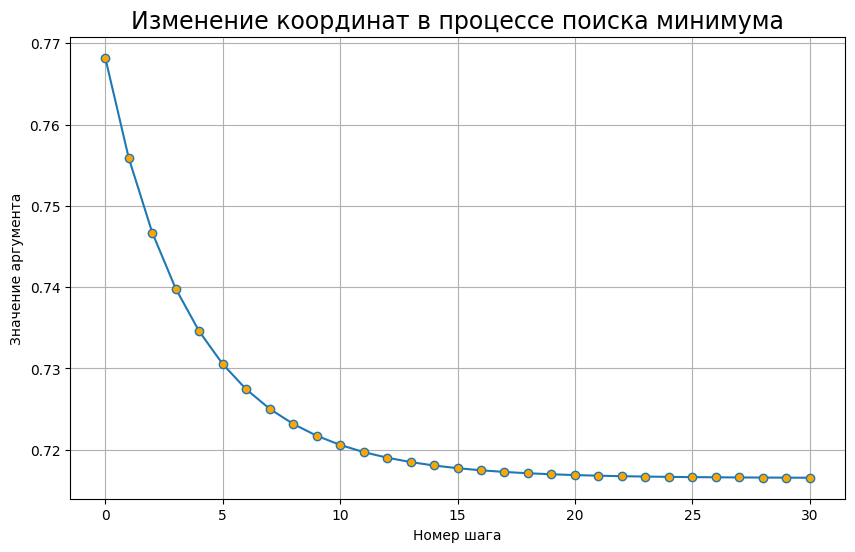

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history, marker='o', markerfacecolor='orange')
plt.title('Изменение координат в процессе поиска минимума', fontsize=17)
plt.xlabel('Номер шага')
plt.ylabel('Значение аргумента')
plt.grid()
plt.show()

5. Реализовать поиск минимума при помощи алгоритма `RMSProp`. Реализуйте функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr, $β$ и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

Напомним как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ -- learning rate, $ɛ$ -- малое число (можно взять 0.0001 -- оно нужно, чтобы случайно не было деления на 0), $\beta$ -- мера учета инерции

In [ ]:
# функция поиска минимума при помощи алгоритма RMSProp
def get_min_with_rmsprop(initial_x, num_steps, lr, beta, threshold):
    x_history = []
    y_history = []
    x = initial_x
    epsilon = 1e-4
    gamma = 0

    for step in range(num_steps):
        gradient = compute_gradient(x)
        gamma = (1 - beta) * gamma + beta * np.square(gradient)
        x = x - lr * gradient / (np.sqrt(gamma) + epsilon)
        x_history.append(x)
        y = compute_function_value(x)
        y_history.append(y)
        if np.linalg.norm(gradient) < threshold:
            break
    return x_history, y_history

# функция для вычисления градиента в данной точке
def compute_gradient(x):
    gradient = 2 * x + 6 * x * np.log(x) + 3 * x**2 / x
    return gradient

# функция для вычисления значения функции в данной точке
def compute_function_value(x):
    y = x**2 + 3 * x**2 * np.log(x)
    return y

In [ ]:
# Запустите поиск минимума с нескольких точек
history_rmsprop_1 = get_min_with_rmsprop(0.1 , 10, 0.1, 0.9, 0.01)
history_rmsprop_2 = get_min_with_rmsprop(2.0, 10, 0.1, 0.9, 0.01)

6. Нарисовать график, на котором отображен реальный минимум функции и все точки, которые были получены на каждом шаге RMSProp алгоритма.

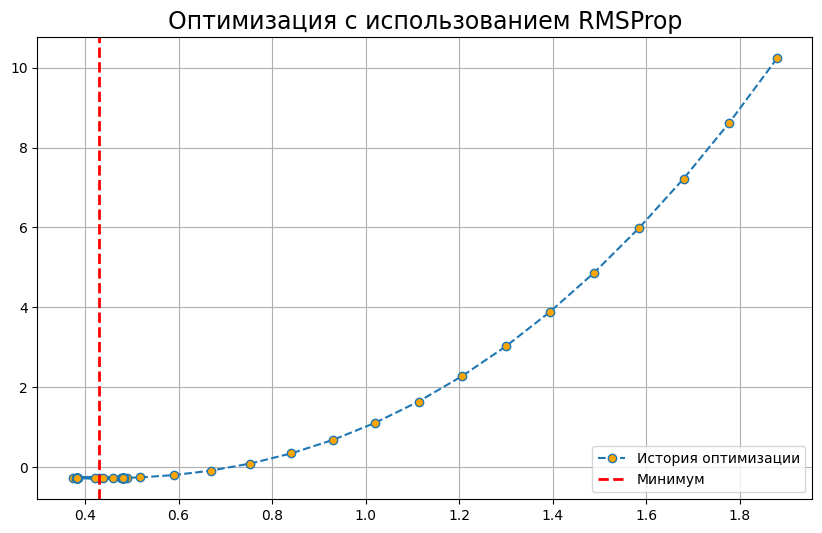

In [ ]:
x_history, y_history = get_min_with_rmsprop(2.0, 100, 0.1, 0.7, 0.00001)

# находим индекс минимума
min_index = np.argmin(y_history)
x_min = x_history[min_index]
y_min = y_history[min_index]

# график
plt.figure(figsize=(10, 6))
plt.plot(x_history, y_history, marker='o', linestyle='--', markerfacecolor='orange', label='История оптимизации')
plt.axvline(x=x_min, color='red', linestyle='--', label='Минимум', linewidth=2)
plt.title('Оптимизация с использованием RMSProp', fontsize=17)
plt.legend()
plt.grid(True)
plt.show()